https://github.com/hccho2/DL-UPMTP/blob/main/DL-TF-TORCH-CH2-3-Regression-DL.ipynb

In [ ]:
%pip install seaborn

In [ ]:
%pip install koreanize-matplotlib

import koreanize_matplotlib

# 제3장 Deep Learning  

## 3.1 문제 해결과 가상 데이터  

### 3.1.1 선형회귀 문제 해결 절차  

1. Data 준비  
2. 모델 수립 : 모델 weight *W*의 shape는 (n,1)이 되고 bias *B*의 shape는(1,1)또는 (1,)  
n=1일 경우를 단순 선형회귀모형이라 부른다.
3. 손실(Loss)함수 정의  
곱해진 상수 차이는 구해지는 최적해에 영향을 주지 않는다.
4. 최적화로 파라미터(parameter) 찾기
5. 하이퍼 파라미터(Hyper-Parameter) : 최적화 과정에서 찾아야 하는 변수가 아니고, 미리 설정해 주어야 하는 값  
ex : learning rate, 미니배치 크기, 학습 횟수

### 3.1.2 비선형 경계 data 분류(Logistic 회귀)  

데이터 class가 2개 이고 , 경계가 원형이나 곡선 모양으로 되어 있다.  
단순 선형회귀 모델로는 분류의 경계가 직선으로 나오기 때문에, 이런 데이터에서는 제대로 된 분류를 할 수가 없다.  

<br>

해결책  
1. 원본 데이터(raw data)를 모델에 적합한 형태(feature,속성)로 가공하는 작업을 **피처 엔지니어링(Feature Engineering)** 이라고 부른다. 
피처 엔지니어링중에 간단한 방법으로, 주어진 데이터를 가공하여 차원을 늘리는 기법이 있다. ex : ($x_1,x_2$) --> ($x_1,x_2,x_1x_2$)
2. 딥러닝 활용  
선형회귀 모델은 FC Layer를 1개만 가지고 있는 모델이다.  
Layer 개수를 여러 개로 늘리면 딥러닝 모델이 된다.

## 3.2 Feature Engineering 기법  

**Polynomial Feature** : 원래 가지고 있는 데이터를 서로 곱해서 새로운 피처를 만들어 내는 방법 ex : ($x_1,x_2$) --> ($x_1,x_2,x_1^2,x1x2,x_2^2$)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(100)

a = [[2,3],[3,4]]
PolynomialFeatures(degree=2,include_bias=False).fit_transform(a)

array([[ 2.,  3.,  4.,  6.,  9.],
       [ 3.,  4.,  9., 12., 16.]])

sigmoid 함수 : 출력값이 0과 1 사잇값으로 변환하는데 많이 사용되는 함수  
$\sigma(x) = \frac{1}{1 + e^{-x}}$  

<br>
Tensorflow에서 FC Layer에 sigmoid 함수를 붙여주는 방법 : 

`tf.keras.layers.Dense(1,activation='sigmoid)`  
- activation function 은 활성 함수 또는 활성화 함수

<br>

행렬 *XW*를 sigmoid 함수에 대입 한다는 의미는 행렬의 각 원소에 sigmoid 함수를 취한다는 것을 의미  
원소별로 취한다는 것을 element-wise라고 표현  

<br>

**BCE(Binary Cross Entropy) Loss 함수** : 분류 문제에서 손실 함수는 MSE와는 다르게 정의 된다 -> 모델의 예측값이 확률이기 때문  
- BCE Loss는 target y가 1(A그룹)인 경우와 0(B그룹)인 경우로 나누어서 정의  
모델이 예측한 확률을 *x*라고 하자 BCE Loss함수를 정리하면 다음과 같다  
$\text{BCE}(1, \hat{y}) = - \log(\hat{y})$ <br> $\text{BCE}(0, \hat{y}) = - \log(1 - \hat{y})$  

- 이진 분류에서 y는 0또는 1인 경우만 있기 때문에 2가지 경우를 결합해서 다음과 같이 하나로 표현  
$\text{BCE}(y, \hat{y}) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)$  

- 지금까지 설명한 모델은 선형회귀에 sigmoid 함수를 결합한 모델 이렇게 선형회귀와 sigmoid 함수를 결합한 모델을 Logistic Regression 모델이라 한다.

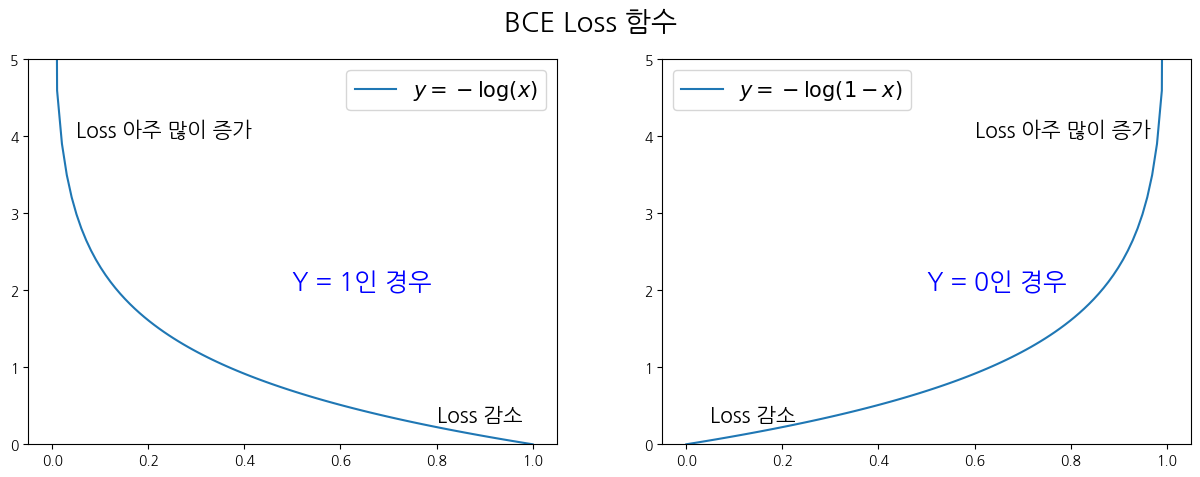

In [11]:
epsilon=1e-8
x = np.linspace(epsilon,1-epsilon,100)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(x,-np.log(x),label=r'$y=-\log(x)$')
plt.ylim(0,5)
plt.text(0.8,0.3,f"Loss 감소",fontsize=15)
plt.text(0.05,4,f"Loss 아주 많이 증가",fontsize=15)
plt.text(0.5,2,f"Y = 1인 경우",fontsize=18,color="Blue")

plt.legend(fontsize="15")

plt.subplot(1,2,2)
plt.plot(x,-np.log(1-x),label=r'$y=-\log(1-x)$')
plt.ylim(0,5)
plt.text(0.05,0.3,f"Loss 감소",fontsize=15)
plt.text(0.6,4,f"Loss 아주 많이 증가",fontsize=15)
plt.text(0.5,2,f"Y = 0인 경우",fontsize=18,color="Blue")
plt.legend(fontsize="15")
plt.suptitle('BCE Loss 함수',fontsize=20)
plt.show()

BCE Loss 계산

In [12]:
import numpy as np
import tensorflow as tf
import torch
np.random.seed(100)

In [14]:
# Numpy

def sigmoid(x):
    # 이렇게 단순히 구현하면 overflow가 발생할 수 있다.
    return 1/(1+np.exp(-x))

def bce(y_hat,y):
    '''
    y_hat: probability
    y: target
    '''
    epsilon = 1e-07
    loss = -y*np.log(y_hat+epsilon) - (1-y)*np.log(1-y_hat+epsilon)
    return loss.mean()


batch_size = 5
y_pred = np.random.randn(batch_size) # logit

true_label_prob = True
if true_label_prob:
    y_true = np.random.rand(batch_size) #  0-1 사이의 확률
else:
    y_true = np.random.randint(2,size=batch_size) # 0 또는 1

print(sigmoid(y_pred), y_true)
bce(sigmoid(y_pred),y_true)

[0.62579495 0.44388684 0.42191444 0.60420013 0.39202055] [0.27407375 0.43170418 0.94002982 0.81764938 0.33611195]


0.7192533147876631

In [16]:
# Tensorflow
bce_loss1  = tf.keras.losses.BinaryCrossentropy(from_logits=True) # 모델의 출력이 로짓(logits) 형태임을 나타내며, 내부적으로 시그모이드 함수를 적용하여 확률로 변환
bce_loss2  = tf.keras.losses.BinaryCrossentropy(from_logits=False) # 모델의 출력이 이미 확률 형태(0과 1 사이의 값)임을 나타냄

print(bce_loss1(y_true,y_pred))
print(bce_loss2(y_true,tf.sigmoid(y_pred)))

# tf.nn.sigmoid_cross_entropy_with_logits: 이 함수는 로짓과 실제 레이블을 입력으로 받아 직접적으로 BCE 손실을 계산, 내부적으로 시그모이드 함수가 적용
# tf.reduce_mean(): 계산된 손실 값의 평균을 구한다. 이 값이 최종 BCE 손실 값
print(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(y_true.astype(np.float64),y_pred)))

tf.Tensor(0.71925354, shape=(), dtype=float32)
tf.Tensor(0.71925354, shape=(), dtype=float32)
tf.Tensor(0.7192535241360265, shape=(), dtype=float64)


In [17]:
# Pytorch
bce_loss3 = torch.nn.BCEWithLogitsLoss()
bce_loss4 = torch.nn.BCELoss()
yy_true = torch.Tensor(y_true) # float 32
yy_pred = torch.Tensor(y_pred) # float 32
print(bce_loss3(yy_pred,yy_true))
print(bce_loss4(torch.sigmoid(yy_pred),yy_true))
print(torch.nn.functional.binary_cross_entropy(torch.sigmoid(yy_pred),yy_true))

tensor(0.7193)
tensor(0.7193)
tensor(0.7193)


- Tesnsorflow API는 `(y_true,y_pred)` 순서로 입력되는 반면 Pytorch는 `(y_pred,y_true)`
- logit는 activation function인 sigmoid 함수를 취하기 전 Tensor를 의미, sigmoid를 취해서 확률이 된다. 
- `y_true`는 0 또는 1의 값을 가지는 것이 기본이지만, 0과1 사잇값을 가지는 Tensor도 가능, 코드에서 `true_label_prob`를 True 또는 False로 바꿔서 테스트해 볼 수 있다. 

### 3.2.1 Backward-Propagation  

$L_s = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)$  

1. 시그모이드 함수의 재표현

    $\sigma(x) = \frac{1}{1 + e^{-x}} \Rightarrow \sigma(x) = (1 + e^{-x})^{-1}$

3. 합성 함수의 미분
합성 함수의 미분을 위해 다음과 같이 적용:

    $\frac{d\sigma}{dx} = -1 \cdot (1 + e^{-x})^{-2} \cdot \frac{d}{dx}(1 + e^{-x})$

4. 내부 함수의 미분
이제 내부 함수 $(1 + e^{-x})$를 미분:

    $\frac{d}{dx}(1 + e^{-x}) = 0 - e^{-x} \cdot (-1) = e^{-x}$

5. 결과 결합
이제 모든 부분을 결합하여 미분 결과를 도출합니다:

    $\frac{d\sigma}{dx} = - (1 + e^{-x})^{-2} \cdot e^{-x}$

6. 시그모이드 함수 표현으로 변환
이제 시그모이드 함수의 표현을 사용하여 결과를 정리:

    $\frac{d\sigma}{dx} = \frac{e^{-x}}{(1 + e^{-x})^2}$

7. 시그모이드 함수와의 관계
시그모이드 함수의 결과와 관련하여 다음과 같은 관계를 사용:

    $\sigma(x) = \frac{1}{1 + e^{-x}} \quad \text{and} \quad 1 - \sigma(x) = \frac{e^{-x}}{1 + e^{-x}}$

8. 결론:

    $\frac{d\sigma}{dx} = \sigma(x)(1 - \sigma(x))$


경사하강법 관점에서 해석:  
learning rate을 $\alpha$(>0)라고 했을 때, $z$에 경사하강법을 적용  
$z \leftarrow z-\alpha(\sigma(x)-y)$
<br>

y = 1인 경우와 y = 0인 경우로 나누어 생각
- y = 1인 경우 : $\sigma(x)-y=\sigma(x)-1 < 0$이 된다. $z$에는 양수가 더해져서 $z$의 값이 더 커지게 된다.  
$z$가 커진다는 것은 $sigma(x)$도 커져서 예측 확률이 높아지게 된다.
- y = 0인 경우 : $\sigma(x)-y=\sigma(x) > 0$이 된다. $z$에는 양수가 빼는 형식이 되어 $z$의 값이 더 작아지게 된다.  
$z$가 작아지면 $sigma(x)$도 작아져서 예측 확률은 0에 좀 더 가까워지게 된다.


### 3.2.2 Hadamard Product  

**아다마르 곱(Hadamard Product)** : 같은 크기의 두 개의 행렬 *A*,*B*가 주어져 있을 때, 두 행렬의 대응되는 원소끼리 곱(element-wise product)하는 것  
Hadamard 곱은 $A \circ B$로 표시  
Python의 Numpy array에서 `*`는 Hadamard 곱이다

### Numpy로 구현  

Logistic Regression 모델을 class `ModelLogisticRregrsssion`로 구현

In [2]:
from sklearn.datasets import make_circles, make_moons
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

class ModelLogisticRegression:
    def __init__(self,input_dim):
        self.W = np.random.randn(input_dim)
    def __call__(self,X):
        return sigmoid(X.dot(self.W))
    def update_weight(self,dW,lr):
        self.W -= lr*dW

def generate_data(N, data_type='moon'):
    if data_type == 'moon':
        return make_moons(n_samples = N, random_state=0, noise=0.2)  # numpy array
    elif data_type == 'circle':
        return make_circles(n_samples = N,factor=0.7, random_state=0, noise=0.1) #factor가 높으면 혼잡도 증가
    else:
        print("data typed은 'moon' 또는 'circle' 이어야 합니다.")
        return None,None

In [25]:
np.random.seed(100)
learning_rate = 0.01
n_epochs = 50000

N= 1000
X, Y = generate_data(N, 'moon') # (N,2), (N,)

polynomial_degree = 10  # polynomial degree
XX = PolynomialFeatures(degree=polynomial_degree,include_bias=True).fit_transform(X)
input_dim = XX.shape[1]
model_np = ModelLogisticRegression(input_dim)

Loss_all = []
for i in range(n_epochs):
    Y_hat = model_np(XX)
    Loss = bce(Y_hat,Y)
    Loss_all.append(Loss)

    dZ = (Y_hat - Y)/N
    dW = XX.T.dot(dZ)
    model_np.update_weight(dW,learning_rate)

    if i%1000==0:
        print(f'{i}/{n_epochs}: loss = {Loss}')

Y_pred = np.where(Y_hat > 0.5,1,0)
acc = (Y_pred == Y).mean() # Train Accuracy
print(f'Train Accuracy: {acc}')

/var/folders/q6/lhzg2qb16hbgw3dcs6d9xjx40000gn/T/ipykernel_67965/3847910729.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0/50000: loss = 3.0521182008816523
1000/50000: loss = 0.4011171312151624
2000/50000: loss = 0.27762188248137043
3000/50000: loss = 0.22839029516707873
4000/50000: loss = 0.20147373285879677
5000/50000: loss = 0.1842262418664846
6000/50000: loss = 0.17202933303930582
7000/50000: loss = 0.16283532915257115
8000/50000: loss = 0.1555995890776977
9000/50000: loss = 0.14972695992152182
10000/50000: loss = 0.14484845459283566
11000/50000: loss = 0.14072062116127346
12000/50000: loss = 0.13724812824234023
13000/50000: loss = 0.13429546282641594
14000/50000: loss = 0.13173537130674356
15000/50000: loss = 0.12948791102754528
16000/50000: loss = 0.12749438749557387
17000/50000: loss = 0.1257103838872177
18000/50000: loss = 0.1241016693922592
19000/50000: loss = 0.122641255510522
20000/50000: loss = 0.12130752918138205
21000/50000: loss = 0.12008295661294938
22000/50000: loss = 0.11895315472995067
23000/50000: loss = 0.1179062098796843
24000/50000: loss = 0.11693216804527143
25000/50000: loss = 0.

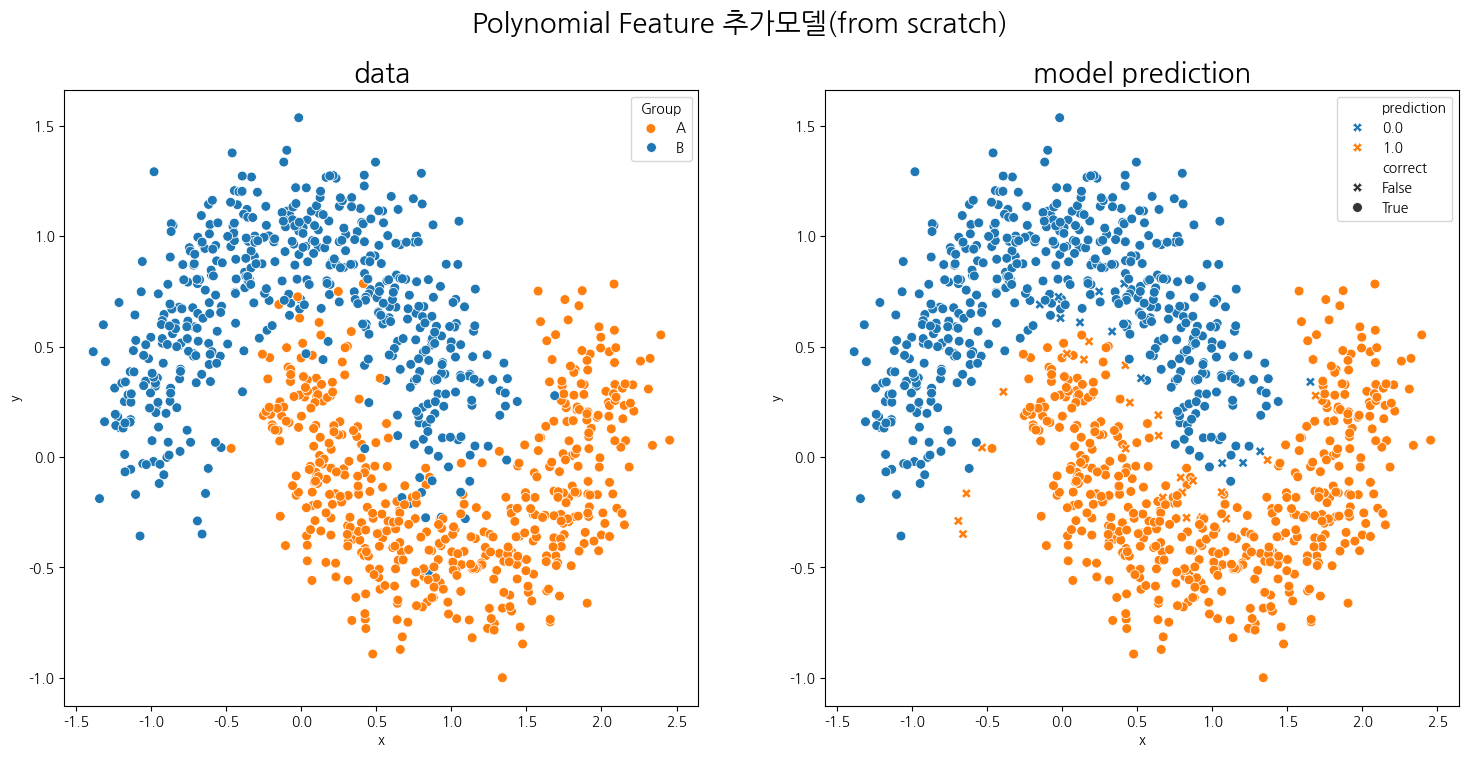

In [26]:
def plot_prediction(X_origin,X_model,Y,model, title):
    '''
    X_origin: orgin data,
    X_model: model input
    '''
    #prediction = tf.where(model(X_model)>0.5,1,0).numpy().reshape(-1)
    prediction = np.where(model(X_model)>0.5,1,0).reshape(-1)

    df_pred=pd.DataFrame(data=np.c_[X_origin,Y, prediction],columns=['x','y','label','prediction'])
    df_pred['correct']=df_pred['label'] == df_pred['prediction'] # True/False

    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    ax = sns.scatterplot(x='x',
                    y='y',
                    hue='label', # different colors by group
                    s=50, # marker size
                    data=df_pred)
    ax.legend(title='Group', labels=['A', 'B'])
    plt.title('data',fontsize=20)

    plt.subplot(1,2,2)
    sns.scatterplot(x='x',
                    y='y',
                    hue='prediction', # different colors by group
                    style='correct', # different shapes by group
                    s=50, # marker size
                    markers = ['X', 'o'],
                    data=df_pred)
    plt.title('model prediction',fontsize=20)
    plt.suptitle(title,fontsize=20)

plot_prediction(X,XX,Y,model_np,"Polynomial Feature 추가모델(from scratch)")

- `np.where()`로 모델 예측값이 0.5를 초과하는지에 따라 class를 나누었다. 
- `np.c_()`는 column을 병합하는 API  
- 모델이 잘 예측한 것과 잘못 예측한 것을 구분하기 위해 True/False로 `df_pred['correct']`를 생성  
- `scatterplot()`에서 `markers = ['X','o']`로 지정

다음 코드는 영역에서 2개 class의 분류 경계를 그리는 코드  
분류의 경계선을 **결정 경계(decision boundary)** 라고 부른다.

/var/folders/q6/lhzg2qb16hbgw3dcs6d9xjx40000gn/T/ipykernel_67965/3847910729.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


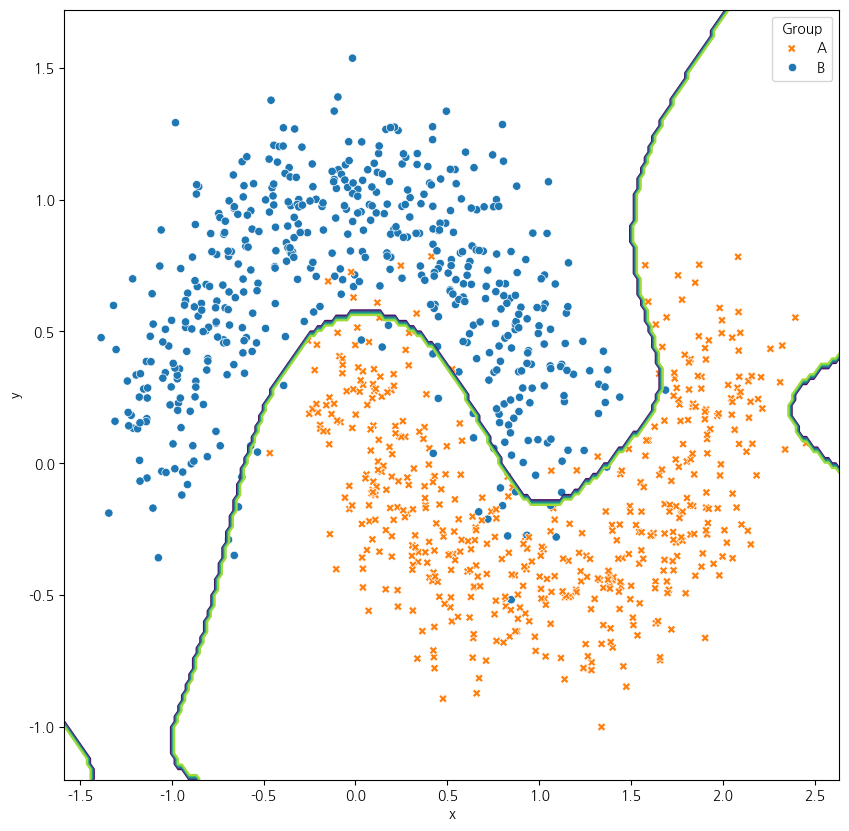

In [28]:
def plot_decision_boundary(X,Y,pred_func,polynomial_degree=0,include_bias=False,torch_model=False,logit_flag=False,device='cpu'):
    # 입력 데이터의 값 범위
    x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
    y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
    h = 0.02
    
    # Grid 생성
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 생성된 Grid 값을 모델에 넣기 위해 Feature 추가
    if polynomial_degree:
        grid_data = PolynomialFeatures(degree=polynomial_degree,include_bias=include_bias).fit_transform(np.c_[xx.ravel(), yy.ravel()])
    else:
        grid_data = np.c_[xx.ravel(), yy.ravel()]
    if torch_model:
        grid_data = torch.Tensor(grid_data).to(device)
        Z = np.array(pred_func(grid_data).detach())
    else:
        Z = np.array(pred_func(grid_data))

    threshold = 0. if logit_flag else 0.5
    Z = np.where(Z > threshold,1,0)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 10))
    plt.contour(xx, yy, Z)

    df = pd.DataFrame(data=np.c_[X,Y],columns=['x','y','target'])
    ax = sns.scatterplot(x='x',y='y',hue='target',style='target',data=df)
    ax.legend(title='Group', labels=['A', 'B'])

plot_decision_boundary(X,Y,model_np,polynomial_degree,include_bias=True)

- `plot_decision_boundry()`는 결정 경계를 만들어 내는 함수, 이 함수에는 앞으로 구현할 딥러닝 모델과 Tensorflow, Pytorch 구현에서도 사용하기 위한 몇 가지 argument가 있다.
    - `polynomial_degree` : 격자로 생성한 데이터도 polynomial feature를 생성해야 모델에 넘길 수 있다.
    - `torch_model` : Pytorch로 구현된 모델 여부에 따라 True/False를 넘겨주면 된다. Pytorch 모델에서는 데이터를 Pytorch Tensor로 변환해 주어야 하기 때문이다.
    - `logit_flag` : 모델의 예측이 sigmoid를 취하지 않은 logit 값인지, 아니면 sigmoid를 취한 확률값인지 여부를 나타낸다. True/False에 따라 class분류를 위한 threshold가 0 또는 0.5가 된다.
        - **threshold** : 모델의 예측 확률을 바탕으로 클래스를 결정할 때 사용하는 기준

- 결정 경계를 구하기 위해 주어진 영역을 격자(grid)로 촘촘하게 나눈다. grid의 x,y 좌표는 `np.meshgird()`로 생성하면 된다.

- 모두 grid의 좌푯값을 모델에 넣어, 분류결과를 Z에 저장
- grid 좌표 xx,yy와 Z를 이용해서 matplotlib의 contour로 결정 경계를 그리면 된다.  
    - `plt.contour()`는 윤곽이나 등고선을 그리는 API , Z값이 0 또는 1로 되어 있기 때문에 `plt.contour()`는 영역의 경계선을 그려준다.

### 3.2.4 Tensorflow로 구현  

In [ ]:
import tensorflow as tf

# 모델 학습시간 너무 오래 걸림
np.random.seed(100); tf.random.set_seed(100)

N= 1000
X, Y = generate_data(N, 'moon')  # (1000, 2), (1000,)

learning_rate = 0.01
n_epochs = 50000
polynomial_degree = 10

XX = PolynomialFeatures(degree=polynomial_degree,include_bias=False).fit_transform(X)

model_tf = tf.keras.Sequential([tf.keras.layers.Dense(1,activation='sigmoid')])
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# loss_fn = tf.keras.losses.BinaryCrossentropy()
# model_tf.compile(optimizer,loss=loss_fn,metrics=['accuracy'])
model_tf.compile(optimizer,loss='bce',metrics=['accuracy'])

history = model_tf.fit(XX,Y,batch_size=N,epochs=n_epochs,verbose=0)

print(f"loss: {history.history['loss'][-1]}, acc: {history.history['accuracy'][-1]}")

plot_decision_boundary(X,Y,model_tf,polynomial_degree)

- `fit`에 `loss='bce`로 하면 내부에서 Loss 함수로 `tf.keras.losses.BinaryCrossentropy(from_logits=False)`가 사용된다  
    - 명시적으로 loss function을 생성해서 넘겨도 된다.
    - 만약 모델이 activation function sigmoid 없이 logit 값을 생성하는 구조라면 loss function은  
    
        `model_tf = tf.keras.Sequential([tf.keras.layers.Dense(1,activation=None)])`
        <br> 
        `loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)`

- 모델 출력의 shape은 (N,1)이지만, target data인 Y의 shape은 (N,) 또는 (N,1) 모두 허용


### 3.2.5 Pytorch로 구현  

In [ ]:
import torch
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

learning_rate = 0.1
n_epochs = 50000

N= 1000
X, Y = generate_data(N, 'moon')  # (N,2), Y(N,)

polynomial_degree = 10
X_ = PolynomialFeatures(degree=polynomial_degree,include_bias=False).fit_transform(X)  # (N,65)

XX = torch.Tensor(X_).to(device)  # float32
YY = torch.Tensor(Y).to(device)   # float32
in_features = XX.shape[-1]

logit_flag = True
if logit_flag:
    model_torch = torch.nn.Sequential(torch.nn.Linear(in_features,1))
    loss_fn = torch.nn.BCEWithLogitsLoss()
else:
    model_torch = torch.nn.Sequential(torch.nn.Linear(in_features,1),torch.nn.Sigmoid())
    loss_fn = torch.nn.BCELoss()
model_torch.to(device)

optimizer = torch.optim.SGD(model_torch.parameters(), lr=learning_rate)


Loss_all = []
model_torch.train() # train mode 변환
for i in range(n_epochs):
    optimizer.zero_grad()
    Y_hat = model_torch(XX)
    Loss = loss_fn(Y_hat.reshape(-1),YY)
    Loss_all.append(Loss.item())
    Loss.backward()
    optimizer.step()
    if i%5000==0:
        print(f'{i}/{n_epochs}: loss = {Loss.item()}')

threshold = 0 if logit_flag else 0.5
Y_pred = np.where(Y_hat > threshold,1,0).reshape(-1)

acc = (Y_pred == Y).mean() # Train Accuracy
print(f'Train Accuracy: {acc}')

- `torch.nn.BCELoss()`에는 Float Tensor가 넘어가야 한다. 정수형 Tensor가 넘어가면 안된다. `torch.Tensor()`로 float32로 변환했다.

- `torch.nn.BCELoss()`보다 `torch.nn.BCEWithLogitsLoss()`가 계산의 효율성은 더 높다. 
    - model에서 sigmoid를 제거 하고 `torch.nn.BCEWithLogitsLoss()`를 사용할 수 있다. 이렇게 구현했을 때는 모델에서 sigmoid를 취하지 않았기 때문에 모델의 예측값을 확률로 변환하기 위해 sigmoid를 취해 주어야 한다.

- sigmoid를 취한 값은 확률이기 때문에 threshold로 0.5를 사용했다. sigmoid를 취하지 않은 logit 값인 경우에는 threshold로 0을 사용했다.

## 3.3 딥러닝으로 해결하기  

FC layer가 인공신경망(Neural Network)의 기본적인 layer이므로 딥러닝 모델과 인공신경망은 거의 같은 의미로 사용된다.  
딥(deep)을 강조하는 측면에서 심층 인공신경망(DNN, Deep Neural Network)이라고 하기도 한다.

### 3.3.1 왜 비선형 함수가 필요한가  

FC Layer은 행렬곱으로 정의된다. FC Layer가 여러개 있는 모델에서는 weight 행렬을 1개만 곱하는게 아니라 여러 개를 곱하는 구조가 된다.  
그런데 행렬의 곱은 결함 법칙이 성립하므로, 뒷부분을 먼저 곱해도 된다.  
$XW_1W_2W_3\ldots W_n = X(W_1W_2W_3\ldots W_n)$  
여기서 $W_1W_2W_3\ldots W_n를 하나의 weight 행렬$W$로 표시한다면,  
$X(W_1W_2W_3\ldots W_n) = XW$  
로 되어 weight 행렬을 여러 개 곱해도 결과적으로 1개만 곱한 것과 동일한 효과밖에 나지 않는다.  
그래서 weight 행렬곱 사이에 비선형 함수를 끼워 놓는 구조룰 고안하게 된다.  
<br>

사이 사이에 끼워넣는 비선형 함수를 **활성(화) 함수(Activation Function)** 라 부른다.  
ex) sigmoid, Relu(Rectified Linear Unit) 함수  
$\text{ReLU}(x) = \max(0,x) =
\begin{cases} 
x & \text{if } x \geq 0 \\
0 & \text{if } x < 0 
\end{cases}$  
<br>

실제 Relu 함수에 넘어가는 x값이 숫자 1개인 경우도 있지만, 배열이나 행렬인 경우가 대부분이다.  
이련 경우에 Relu 함수는 x의 원소별(element-wise)로 적용된다.  
Relu가 많이 사용되는 이유는 Backward-Propagation에서 Gradient Vanishing(기울기 소실) 문제를 완화시켜주기 때문이다.  

Text(0.5, 1.0, 'RELU')

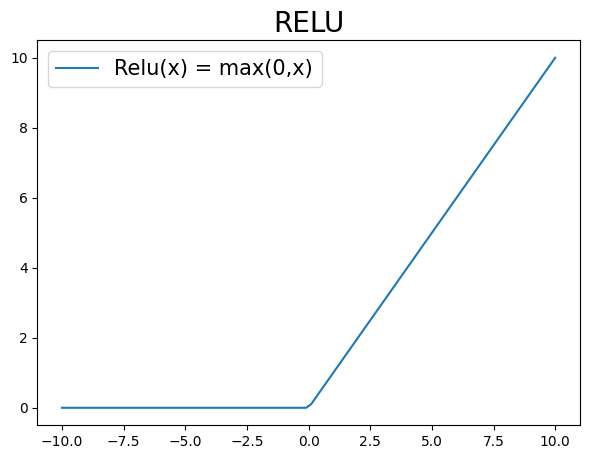

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(x,0)

x = np.linspace(-10,10,100)
plt.figure(figsize=(7,5))
plt.plot(x,relu(x),label=r'Relu(x) = max(0,x)')
plt.legend(fontsize="15")
plt.title('RELU',fontsize = 20)

In [ ]:
# Tensorflow, Pytorch의 Relu API

tf.keras.layers.ReLU(max_value=None) # class Layer
torch.nn.ReLU(inplace=False) # class Layer

tf.nn.relu(features,name=None) # function
torch.nn.functional.relu(input, inplace=False) # function

weight 행렬을 곱한 후, 활성 함수를 적용하는 것까지 묶어서 FC Layer라고 하기도 한다.  
Pytorch에서는 Relu와 같은 활성 함수도 하나의 layer로 처리해야한다 (Tensorflow의 `Dense()` API는 활성 함수도 넣어줄 수 있다)

### 3.3.2 이진 분류를 위한 Deep Learning 모델 설계  

5-Layer Network 구조에서 각각의 FC Layer의 차원을 정해주어야 한다. 차원은 상황에 맞게 임의로 정해줄 수 있는 hyper parameter이다. 단, 마지막 차원만 1이면 된다.  
<br>

- `tf.keras.Sequential()`과 `torch.nn.Sequential()`은 비슷한 방식으로 Layer들을 넘겨준다.  
- `tk.keras.Sequential()`는 Layer가 2개 이상이면 반드시 list로 묶어 주어야 하고, `torch.nn.Sequential()`는 lsit로 묶으면 안된다.
- Tensorflow는 activation function 'relu'를 `Dense()`에 넘겨서 FC Layer를 만들어 내고 있다.
- Pytorch는 FC Layer API인 `nn.Linear()`와 activation function `nn.ReLU()`를 각각 생성해주어야 한다.
- weight 파라메터의 개수로 모델의 크기를 파악한다.
- **MLP(Multi-Layer Perceptron, 다층 퍼셉트론)**: 여러 층의 FC Layer를 쌓아서 만든 인공신경망을 MLP라 부른다. 앞으로 나올 **CNN(Convolutional Neural Network)** 이나 **RNN(Recurrent Neural Network)** 과 대비되는 용어로 사용된다.
- 모델의 요약 정보를 얻을 수 있는 API  
    Tensorflow : `model.summay()`  
    Pytorch : `torchinfo.summary(model)`

### 3.3.3 Tensorflow 구현  

In [5]:
import numpy as np
import tensorflow as tf
     

np.random.seed(100); tf.random.set_seed(100)

N = 1000
X, Y = generate_data(N, 'moon') # (N,2), (N,)

learning_rate = 0.01
n_epochs = 500

model_tf = tf.keras.Sequential(
    [tf.keras.layers.Dense(10,activation='relu'),
     tf.keras.layers.Dense(10,activation='relu'),
     tf.keras.layers.Dense(10,activation='relu'),
     tf.keras.layers.Dense(10,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')])
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model_tf.compile(optimizer,loss='bce',metrics=['accuracy'])

history = model_tf.fit(X,Y,batch_size=N,epochs=n_epochs,verbose=0)

print(f"loss: {history.history['loss'][-1]}, Train Accuracy: {history.history['accuracy'][-1]}")

loss: 0.47415703535079956, Train Accuracy: 0.824999988079071


### 3.3.4 Pytorch 구현

In [ ]:
%pip install torchinfo

In [9]:
import torch
import numpy as np
from torchinfo import summary
     
np.random.seed(100)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(100)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(100)

model_torch = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1),
    torch.nn.Sigmoid()
)
     

N= 1000
X, Y = generate_data(N, 'moon') # (N,2), (N,)

learning_rate = 0.01
n_epochs = 5000

XX = torch.Tensor(X).to(device)
YY = torch.Tensor(Y).reshape(-1,1).to(device)

model_torch.to(device)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_torch.parameters(), lr=learning_rate)

Loss_all = []
model_torch.train()  # train mode 변환
for i in range(n_epochs):
    optimizer.zero_grad()
    Y_hat = model_torch(XX) # Y_hat shape : (N,1)
    Loss = loss_fn(Y_hat,YY)
    Loss_all.append(Loss.item())
    Loss.backward()
    optimizer.step()
    if i%1000==0:
        print(f'{i}/{n_epochs}: loss = {Loss.item()}')

Y_pred = np.where(Y_hat > 0.5,1,0).reshape(-1)
acc = (Y_pred == Y).mean() # Train Accuracy
print(f'Train Accuracy: {acc}')

0/5000: loss = 0.6966015696525574
1000/5000: loss = 0.6880443692207336
2000/5000: loss = 0.6350035667419434
3000/5000: loss = 0.2852145731449127
4000/5000: loss = 0.18367086350917816
Train Accuracy: 0.959


- target 데이터 Y의 shape은 (N,)이고 Pytorch Tensor로 변환할 때는 shape(N,1)로 만들었다. 이렇게 변환해 주어야 torch.nn.BCELoss에 넘어갈 때, 모델의 출력인 Y_hat과 같은 shape가 된다.

## 3.4 2-Layer 모델의 역전파  

### 3.4.1 A Neural Network in 11 lines  

11줄의 코드로 2-Layer 인공신경망을 훈련하는 코드  
입력 데이터 X의 세 번째 열은 모두 1로 되어 있다. 모두 1로 된 열은 bais를 위해 추가로 삽입된 데이터  
세 번째 열을 제외하고 X,Y의 관계를 보면 XOR 연산임을 알 수 있다.  
XOR 연산은 1-Layer 모델로 풀 수 없는 대표적인 문제

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
Y = np.array([[0,1,1,0]]).T
W1 = 2*np.random.random((3,4)) - 1
W2 = 2*np.random.random((4,1)) - 1
for j in range(60000):
    Z = 1/(1+np.exp(-(np.dot(X,W1))))
    Y_hat = 1/(1+np.exp(-(np.dot(Z,W2))))
    dX2 = (Y - Y_hat)*(Y_hat*(1-Y_hat))
    dZ = dX2.dot(W2.T) * (Z * (1-Z))
    W2 += Z.T.dot(dX2)
    W1 += X.T.dot(dZ)

np.where(Y_hat>0.5,1,0)

array([[0],
       [1],
       [1],
       [0]])

- Forward Propagation(순전파, Forward Pass): 데이터의 개수가 4개이므로 N=4이고, 첫 번째 layer(hidden layer)의 차원도 4이다(h=4)
- weight $W_1 W_2$ 초기화: `np.random.random API`은 0~1 사이의 균등 난수(uniform random number)를 생성해 준다. 여기에 2를 곱한 후 1을 빼면 -1~1 사이의 난수가 된다. <- 양수, 음수를 모두 가지는 난수로 만들어주기 위해서이다.  
    `2*np.random.random(shape)-1`

    uniform random을 사용하지 않고, normal random(표준 정규분포를 따르는 난수)을 사용하는 것이 더 일반적이다.  
    `np.random.randn(shape)`

**2-Layer 모델의 역전파** 그림 및 수식 참고  


## 3.5 연쇄 법칙, 행렬곱 역전파 예시

### 3.5.1 Relu 역전파

$\text{ReLU}(x) = \max(0,x) =
\begin{cases} 
x & \text{if } x \geq 0 \\
0 & \text{if } x < 0 
\end{cases}$  
<br>
입력값 X가 실수가 아니고 행렬 또는 벡터인 경우는 원소별로 적용된다 따라서 Relu의 역전파에서도 미분값이 원소별로 적용  
수치해석적인 관점에서 입력값이 정확히 0이 될 확률은 없다고 보기 때문에 입력값이 0이 되는 경우는 무시  

Relu의 미분값은 0 또는 1이기 때문에, 0 또는 1이 upstream gradient $dy_i$와 곱해져서 $dx_i$가 구해진다


In [2]:
import numpy as np
     

def relu(x):
    return np.maximum(x,0)

n = 10
X = np.random.randn(n)
Y = relu(X)

dY = np.random.randn(n)  # upstream gradient dY는 이미 계산되었다고 가정.

dX = dY.copy()
dX[X<0] = 0

print(dX)

[ 0.          0.          0.          1.83713289  0.          0.
  0.         -0.05486466  0.          0.        ]


### 3.5.2 Sigmoid 역전파  

X에 대하여 $Y=Sigmoid(x)=\sigma(x)$ 일 때, upstream gradient dY가 주여져 있다고 하자 이 경우 X의 gradient dX는  
$dX = Y(1-Y)dY$

### 3.5.3 행렬곱 미분 예  

$X0 = \begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n\end{bmatrix}$ ---> $X = \begin{bmatrix}
                                                1 & x_1 & x_1^2 & x_1^3 \\
                                                1 & x_2 & x_2^2 & x_2^3 \\ 
                                                \vdots & \vdots & \vdots & \vdots \\
                                                1 & x_n & x_n^2 & x_n^3
                                                \end{bmatrix}$

<br>

$L = ||\hat{Y} - Y||^2$  
<br>

$\frac{\partial L}{\partial \mathbf{W}} = \mathbf{x}^T\cdot\hat{Y}$

<br>
다음은 사인 곡선을 3차 다항식으로 근사하는 회귀 모형이다

99 279.5505182256592
199 199.8850489712109
299 143.6853635387099
399 104.03120697027045
499 76.0463392061661
599 56.29335608381085
699 42.34855041660154
799 32.50258549644917
899 25.54968373509805
999 20.63911184849772
1099 17.170524592549313
1199 14.720195839126902
1299 12.98900845294451
1399 11.765776574057497
1499 10.901374761721033
1599 10.290486106742131
1699 9.858723058914102
1799 9.553537794647337
1899 9.337806013591816
1999 9.185297139958877
Result: y = -0.02018989659808016 + 0.8547240000447147 x + 0.00348309312449837 x^2 + -0.0930435106825373 x^3


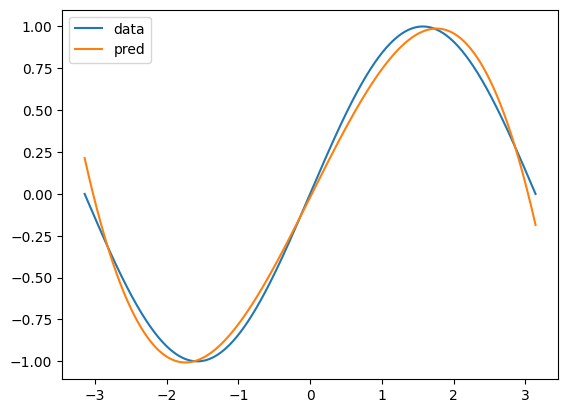

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
     

# Create random input and output data
n = 2000; n_epoch = 2000
x = np.linspace(-math.pi, math.pi, n)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(n_epoch):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

plt.plot(x,y,label='data')
plt.plot(x,y_pred,label='pred')
plt.legend()

### 3.5.4 2-Layer Model From Scratch  



50 14245.52807832458
100 347.1467318097987
150 15.223268538390974
200 0.9152741424130134
250 0.0658815151647226
300 0.005270487365453126
350 0.00044934438161731095
400 3.983757582013523e-05
450 3.6212618697574135e-06
500 3.3467608904879823e-07


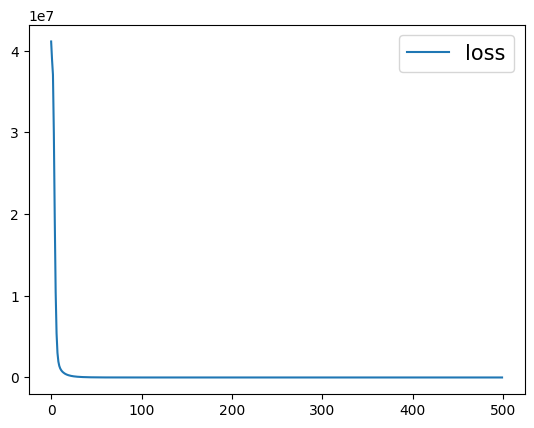

In [4]:
import numpy as np
import matplotlib.pyplot as plt
     

N, Di, H, Do = 64, 1000, 100, 10

# 무작위의 입력과 출력 데이터를 생성
X = np.random.randn(N, Di)
Y = np.random.randn(N, Do)

# 무작위로 가중치를 초기화
W1 = np.random.randn(Di, H)
W2 = np.random.randn(H, Do)

learning_rate = 1e-6
loss_all = []
for t in range(500):
    # 순전파: 예측값 y를 계산
    Z = X.dot(W1)   # (N,H)
    Z_relu = np.maximum(Z, 0)
    Y_pred = Z_relu.dot(W2) #(N,Do)

    # 손실(loss)를 계산하고 출력
    loss = np.square(Y_pred - Y).sum()
    loss_all.append(loss)
    if (t+1)% 50 == 0:
        print(t+1, loss)

    # 손실에 따른 W1, W2의 gradient를 계산
    grad_Y_pred = 2.0 * (Y_pred - Y)  # shape(N,Do)
    grad_W2 = Z_relu.T.dot(grad_Y_pred) # shape(H,Do) = W2 shape
    grad_Z_relu = grad_Y_pred.dot(W2.T)
    grad_Z = grad_Z_relu.copy()
    grad_Z[Z < 0] = 0
    grad_W1 = X.T.dot(grad_Z)  # shape(Di,H) = W1 shape

    # W1, W2 업데이트
    W1 -= learning_rate * grad_W1
    W2 -= learning_rate * grad_W2

plt.plot(loss_all, label='loss')
plt.legend(fontsize=15)

## 3.6 Layer Weight 초기화

FC Layer의 2가지 weight 초기화 방법으로 **LeCun Initialization**과 **He Initialization**이 있다  


**LeCun Initialization** : 정규 분포 std = $\sqrt{1/FanIn}$ - 이 방식을 Xavier(Glorot) Initalizatoin으로 부르는 경우도 있다  
**He Initialization** : 정규 분포 std = $\sqrt{2/FanIn}$ - 활성함수가 ReLu인 경우에 적합 , Kaiming Initalization으로 부르기도 함  

<br>

Tensorflow, Pytorch에서는 정규분포를 따르는 난수로 초기화하거나 Uniform Random(균등 난수)으로 초기화한다

### 3.6.1 Tensorflow 가중치 초기화

`tf.keras.layer.Dense()`

`kernel_initializer`, `bias_initializer`에 필요한 initializers를 넘겨 주면 된다

In [5]:
from tensorflow.keras.initializers import Constant, GlorotNormal
import numpy as np
import tensorflow as tf

init = np.array([[2,1,5],[0.1,2,-1]]) # init: shape(2,3) --> 입력차원=2, 출력차원=3
L = tf.keras.layers.Dense(3, kernel_initializer=Constant(init))

L2 = tf.keras.layers.Dense(5,kernel_initializer=GlorotNormal())

L.build((None,2))  #  (batch_size,입력차원)
L2.build((None,2))  #  (batch_size,입력차원)

print(L.weights)
print(L2.weights)

[<KerasVariable shape=(2, 3), dtype=float32, path=dense_4/kernel>, <KerasVariable shape=(3,), dtype=float32, path=dense_4/bias>]
[<KerasVariable shape=(2, 5), dtype=float32, path=dense_5/kernel>, <KerasVariable shape=(5,), dtype=float32, path=dense_5/bias>]


### 3.6.2 Pytorch 가중치 초기화

weight 초기화 API에 weight를 직접 넣는 방식으로 초기화 한다

In [6]:
import torch
import torch.nn as nn
import numpy as np


def weights_init(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)  # m.bias.data.fill_(0.)
    elif isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.zeros_(m.bias)

net = torch.nn.Sequential(nn.Linear(2,3),nn.ReLU(),nn.Linear(3,2))

net[0].bias  # default initialization인 He Uniform

Parameter containing:
tensor([-0.4716,  0.3701, -0.1002], requires_grad=True)

In [7]:
net.apply(weights_init)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=2, bias=True)
)

In [8]:
# bias가 0으로 초기화된 것을 확인할 수 있다.
net[0].bias, net[0].weight

(Parameter containing:
 tensor([0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[-1.1907,  0.2530],
         [-1.2139,  0.0834],
         [-1.5651, -0.2962]], requires_grad=True))

In [9]:
net[0].weight.data.normal_(0,1)

tensor([[ 1.3193, -1.7518],
        [-0.8317,  1.1899],
        [ 0.8817,  1.6791]])

In [10]:
net[0].bias.data.fill_(0.1)  # 모두 같은 값으로 채운다.

tensor([0.1000, 0.1000, 0.1000])

In [11]:
# 이렇게 할 수도 있다.
net[0].bias.data = torch.Tensor(np.array([1.2,2.2,3.3]))

In [12]:
net[0].bias, net[0].weight

(Parameter containing:
 tensor([1.2000, 2.2000, 3.3000], requires_grad=True),
 Parameter containing:
 tensor([[ 1.3193, -1.7518],
         [-0.8317,  1.1899],
         [ 0.8817,  1.6791]], requires_grad=True))